In [1]:
# Dependencies
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd

In [2]:
# URL to scrape
url = 'https://www.eatthis.com/favorite-cocktail-every-state/'

# Retrieve page with the requests module
html = requests.get(url)

In [3]:
soup = BeautifulSoup(html.text, 'html.parser')

In [4]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width" id="viewportWidth" name="viewport"/>
  <meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
   <!-- This site is optimized with the Yoast SEO plugin v19.9 - https://yoast.com/wordpress/plugins/seo/ -->
   <title>
    The Most Popular Cocktail in Every State — Eat This Not That
   </title>
   <meta content="Find out which cocktail has been popular in your state during quarantine and which local favorites have crossed state lines." name="description">
    <link href="https://www.eatthis.com/favorite-cocktail-every-state/" rel="canonical"/>
    <meta content="en_US" property="og:locale">
     <meta content="article" property="og:type"/>
     <meta content="The Most Popular Cocktail in Every State — Eat This Not That" property="og:title"/>
     <meta content="Find out which coc

In [5]:
states = []
cocktails = []

for h2 in soup.find_all("h2")[0:50]:
    text = h2.text
    strings = text.split(":")
    
    states.append(strings[0])
    cocktails.append(strings[1][1:])

# print(states)
print(cocktails)

['Bellini', 'White Russian', 'Jack and Coke', 'Mojito', 'Paloma', 'Mimosa', 'Coquito', 'Manhattan', 'Piña Colada', 'Mimosa', 'Mai Tai', 'Hot Buttered Rum', 'Mimosa', 'Tequila Sunrise', 'Fuzzy Navel', 'Wine Cooler', 'Wine Cooler', 'Daiquiri', 'Rusty Nail', 'Mimosa', 'Painkiller', '7 and 7', 'White Russian', 'Old Fashioned', 'Margarita', "Dark N' Stormy", 'Moscow Mule', 'Shirley Temple', 'Margarita', 'Piña Colada', 'Piña Colada', 'Vodka Fizz', 'Mimosa', 'Sex on the Beach', 'SHANDY', 'Bellini', 'Lemon Drop Martini', 'Wine Cooler', "Dark N' Stormy", 'Gin Fizz', 'Screwdriver', 'Mimosa', 'Margarita', 'Rickey', 'Cosmopolitan', 'Mojito', 'Mojito', 'White Russian', 'Old Fashioned', 'Long Island Iced Tea']


In [6]:
cocktail_df = pd.DataFrame({"States": states, "Cocktails": cocktails}).set_index("States")
cocktail_df

,Cocktails
States,
ALABAMA,Bellini
ALASKA,White Russian
ARIZONA,Jack and Coke
ARKANSAS,Mojito
CALIFORNIA,Paloma
COLORADO,Mimosa
CONNECTICUT,Coquito
DELAWARE,Manhattan
FLORIDA,Piña Colada


In [7]:
cocktail_df.to_csv("by_state.csv")
cocktail_df.to_json("by_state.json")

In [7]:
# API TESTING 

In [7]:
from requests import get
from time import sleep
from random import randint

url = "http://api-cocktails.herokuapp.com/api/v1/cocktails?"

api_key = "zmEVA8V1rsvtAPTmiRhf4wtt"

headers = {"Authorization": f"Token {api_key}"}

[{'id': 5646,
  'name': 'Long Island Iced Tea',
  'description': 'A Long Island iced tea is a type of alcoholic mixed drink typically made with vodka, tequila, light rum, triple sec, gin, and a splash of cola, which gives the drink the same amber hue as its namesake. A popular version mixes equal parts vodka, tequila, gin, rum, triple sec, with \u200b1 1⁄2 parts sour mix and a splash of cola. Lastly, it is decorated with the lemon and straw, after stirring with bar spoon smoothly.Most variants use equal parts of the main liquors, but include a smaller amount of triple sec (or other orange-flavored liqueur). Close variants often replace the sour mix with lemon juice, replace the cola with diet cola or actual iced tea, or add white crème de menthe. Most variants do not include any tea. The drink has a much higher alcohol concentration (approximately 22 percent) than most highball drinks due to the relatively small amount of mixer.',
  'ingredients': ['1.5 cl  Tequila',
   ' 1.5 cl  Vodka
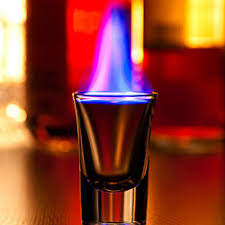

In [8]:
# Testing Cocktails Endpoint
response = get(url, headers=headers)

response.json()


In [14]:
# # Testing Cocktails Endpoint
# response = get(url + "name= gin fizz", headers=headers)
# response.json()

[{'id': 5699,
  'name': "Buck's Fizz",
  'description': "The Buck's Fizz is an alcoholic cocktail made of two parts champagne to one part orange juice. It is very similar to the Mimosa, which also contains champagne and orange juice, but in equal measures. Other sparkling wines can also be used.",
  'ingredients': ['1/2 peach (white; peeled, pitted, and diced)',
   ' 7 mint sprigs (fresh)',
   ' 2 1/2 ounces\xa0bourbon whiskey (Makers Mark)',
   ' 1 ounce\xa0peach liqueur\xa0(Mathilde)',
   ' 2 dashes peach bitters (Fee Brothers)'],
  'categories': ['Food and drink introduced in 1921'],
  'served': 'A shared drink  with straws',
  'standard_drinkware': 'Coffee Mug or Brandy Snifter',
  'standard_garnish': 'Nutmeg',
  'iba': True,
  'rating': 6,
  'image_thumb_url': 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQVV8dQ17YfIbz2g8sIyBKYruYphOifEhH1WMHk2OSeQ8ivNLhlqinnei2-fQ&s',
  'image_large_url': 'https://cdn.diffords.com/contrib/stock-images/2018/05/5af2fe780b90e.jpg'},
 {'id':

In [10]:
# Testing cocktails endpoint for each state's cocktail (currently drawing on list constructed from webscrape)
for cocktail in cocktails:
    try:
        response = get(url + "name=" + cocktail, headers=headers).json()
        print(response[0]["name"], "\n===== going to sleep...")
        sleep(randint(2,5))
    except Exception as e:
        print("something broke... ERROR:", e)
        print("last response:", response)

Bellini 
===== going to sleep...
Black Russian 
===== going to sleep...
Duo and trio s 
===== going to sleep...
Mojito 
===== going to sleep...
Paloma 
===== going to sleep...
Mimosa 
===== going to sleep...
something broke... ERROR: list index out of range
last response: []
Manhattan 
===== going to sleep...
Piña Colada 
===== going to sleep...
Mimosa 
===== going to sleep...
Mai Tai 
===== going to sleep...
Hot Buttered Rum 
===== going to sleep...
Mimosa 
===== going to sleep...
Tequila Slammer 
===== going to sleep...
Fuzzy Navel 
===== going to sleep...
Orchard Catch Cooler 
===== going to sleep...
Orchard Catch Cooler 
===== going to sleep...
Daiquiri 
===== going to sleep...
Black Nail 
===== going to sleep...
Mimosa 
===== going to sleep...
Painkiller 
===== going to sleep...
Duo and trio s 
===== going to sleep...
Black Russian 
===== going to sleep...
Old Etonian 
===== going to sleep...
Margarita 
===== going to sleep...
Black Nail 
===== going to sleep...
Moscow Mule 
=====

In [11]:
# Testing random endpoint 

response = get("http://api-cocktails.herokuapp.com/api/v1/cocktails?random=1", headers=headers)

response.json()

[{'id': 5921,
  'name': 'White Russian',
  'description': 'A White Russian (Russian language: Белый Русский) is a cocktail made with vodka, coffee liqueur (e.g., Kahlúa or Tia Maria) and cream served with ice in an Old Fashioned glass. Often milk or half and half will be used as an alternative to cream.',
  'ingredients': ['5 cl (5 parts) Vodka',
   ' 2 cl (2 parts) List of liqueurs#Coffee liqueurs|Coffee liqueur'],
  'categories': ['Cocktails with vodka',
   ' Cocktails with coffee liqueur',
   ' Coffee culture'],
  'served': 'On the rocks',
  'standard_drinkware': 'old',
  'standard_garnish': 'Salt on the rim (optional)',
  'iba': False,
  'rating': 9,
  'image_thumb_url': 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/White-Russian.jpg/200px-White-Russian.jpg',
  'image_large_url': 'https://upload.wikimedia.org/wikipedia/commons/4/48/White-Russian.jpg'}]

In [37]:
# Pulling API information on state's drinks for use in dataframe

drink = []
recipe = []


for cocktail in cocktails:
    try:
        response = get(url + "name=" + cocktail, headers=headers).json()
        drink.append(response[0]["name"])
        recipe.append(response[0]["ingredients"])
        sleep(randint(2,5))
    except Exception as e:
        drink.append(cocktail)
        recipe.append("")
        
print(drink)
print(recipe)

['Bellini', 'Black Russian', 'Duo and trio s', 'Mojito', 'Paloma', 'Mimosa', 'Coquito', 'Manhattan', 'Piña Colada', 'Mimosa', 'Mai Tai', 'Hot Buttered Rum', 'Mimosa', 'Tequila Slammer', 'Fuzzy Navel', 'Orchard Catch Cooler', 'Orchard Catch Cooler', 'Daiquiri', 'Black Nail', 'Mimosa', 'Painkiller', 'Duo and trio s', 'Black Russian', 'Old Etonian', 'Margarita', 'Black Nail', 'Moscow Mule', 'Shirley Temple', 'Margarita', 'Piña Colada', 'Piña Colada', "Buck's Fizz", 'Mimosa', 'Between the Sheets', 'Shandy', 'Bellini', 'Breakfast martini', 'Orchard Catch Cooler', 'Black Nail', "Buck's Fizz", 'Screwdriver', 'Mimosa', 'Margarita', 'Lime Rickey', 'Cosmopolitan', 'Mojito', 'Mojito', 'Black Russian', 'Old Etonian', 'Long Island Iced Tea']
[['10 cl (2 parts) Prosecco'], ['1/2 peach (white; peeled, pitted, and diced)', ' 7 mint sprigs (fresh)', ' 2 1/2 ounces\xa0bourbon whiskey (Makers Mark)', ' 1 ounce\xa0peach liqueur\xa0(Mathilde)', ' 2 dashes peach bitters (Fee Brothers)'], ['1 part Cognac (dr

In [41]:
ing_1 = []
ing_2 = []
ing_3 = []
ing_4 = []
ing_5 = []


for i in recipe:
    try:
        ing_1.append(i[0])
    except: 
        ing_1.append("")
    
    try:
        ing_2.append(i[1])
    except: 
        ing_2.append("")
        
    try:
        ing_3.append(i[2])
    except: 
        ing_3.append("")
        
    try:
        ing_4.append(i[3])
    except: 
        ing_4.append("")
        
    try:
        ing_5.append(i[4])
    except: 
        ing_5.append("")
        
    
        
        
print(ing_1)
print(ing_2)
print(ing_3)
print(ing_4)
print(ing_5)

['10 cl (2 parts) Prosecco', '1/2 peach (white; peeled, pitted, and diced)', '1 part Cognac (drink)|cognac', '4 cl white rum', 'One part tequila', '7.5 cl Champagne (wine)|champagne', '', '5 Litre#SI_prefixes_applied_to_the_litre|cL Rye whiskey', '50 ml White Rum', '7.5 cl Champagne (wine)|champagne', '1 ounce\xa0light rum', '1 tablespoon butter (soft)', '7.5 cl Champagne (wine)|champagne', 'One part tequila', '1 1/2 ounces peach schnapps', '2 strawberries (quartered)', '2 strawberries (quartered)', '6 cl white rum', '2.5 cl Irish Whisky', '7.5 cl Champagne (wine)|champagne', '2-4 part(s) Pussers Rum', '1 part Cognac (drink)|cognac', '1/2 peach (white; peeled, pitted, and diced)', '1.5 oz. gin', '5 cL (10 parts) Tequila', '2.5 cl Irish Whisky', '4.5 cl (9 parts) vodka', '3 ounces lemon-lime soda', '5 cL (10 parts) Tequila', '50 ml White Rum', '50 ml White Rum', '1/2 peach (white; peeled, pitted, and diced)', '7.5 cl Champagne (wine)|champagne', '3 cl white rum', '6 ounces beer (1/2 bot

In [43]:
# Constructing dataframe containing drinks for the states

recipes_df = pd.DataFrame({"Cocktail": drink, "Ingredient 1": ing_1, "Ingredient 2": ing_2, "Ingredient 3": ing_3, "Ingredient 4": ing_4, "Ingredient 5": ing_5}).set_index("Cocktail")
recipes_df

    

,Ingredient 1,Ingredient 2,Ingredient 3,Ingredient 4,Ingredient 5
Cocktail,,,,,
Bellini,10 cl (2 parts) Prosecco,,,,
Black Russian,"1/2 peach (white; peeled, pitted, and diced)",7 mint sprigs (fresh),2 1/2 ounces bourbon whiskey (Makers Mark),1 ounce peach liqueur (Mathilde),2 dashes peach bitters (Fee Brothers)
Duo and trio s,1 part Cognac (drink)|cognac,1 part Bénédictine,1½ oz. tequila,1/2 oz. Kahlúa,4.5 cl (9 parts) Scotch or rye whisky
Mojito,4 cl white rum,3 cl fresh lime juice,,,
Paloma,One part tequila,,,,
Mimosa,7.5 cl Champagne (wine)|champagne,,,,
Coquito,,,,,
Manhattan,5 Litre#SI_prefixes_applied_to_the_litre|cL Ry...,2 cL Sweet red vermouth,,,
Piña Colada,50 ml White Rum,30 ml Coconut Cream,,,


In [46]:
recipes_df_clean = recipes_df.drop_duplicates()
recipes_df_clean

,Ingredient 1,Ingredient 2,Ingredient 3,Ingredient 4,Ingredient 5
Cocktail,,,,,
Bellini,10 cl (2 parts) Prosecco,,,,
Black Russian,"1/2 peach (white; peeled, pitted, and diced)",7 mint sprigs (fresh),2 1/2 ounces bourbon whiskey (Makers Mark),1 ounce peach liqueur (Mathilde),2 dashes peach bitters (Fee Brothers)
Duo and trio s,1 part Cognac (drink)|cognac,1 part Bénédictine,1½ oz. tequila,1/2 oz. Kahlúa,4.5 cl (9 parts) Scotch or rye whisky
Mojito,4 cl white rum,3 cl fresh lime juice,,,
Paloma,One part tequila,,,,
Mimosa,7.5 cl Champagne (wine)|champagne,,,,
Coquito,,,,,
Manhattan,5 Litre#SI_prefixes_applied_to_the_litre|cL Ry...,2 cL Sweet red vermouth,,,
Piña Colada,50 ml White Rum,30 ml Coconut Cream,,,


In [47]:
recipes_df_clean.to_csv("recipes.csv")
recipes_df_clean.to_json("recipes.json")